## Table of Contents
### 01. Import Data and Libraries
### 02. Data Cleaning
#### - Missing Values
#### - Duplicates
### 03. Data Prep for Regression Analysis
### 04. Regression Analysis
### 05. Extracting Dataframe

---

## 01. Import Data and Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# creating a path into a string variable
path = r'C:\Users\marze\Gun Violence'

In [7]:
# import the cleaned data from the last exercise 

gv_df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.3_gun_violence_cleaned.csv'))

---

## 02. Data Cleaning

In [10]:
gv_df.head()

Unnamed: 0  Incident_ID        Date  Year  Month  Day           State  \
0           0       461105  2013-01-01  2013      1    1    Pennsylvania   
1           1       460726  2013-01-01  2013      1    1      California   
2           2       478855  2013-01-01  2013      1    1            Ohio   
3           3       478925  2013-01-05  2013      1    5        Colorado   
4           4       478959  2013-01-07  2013      1    0  North Carolina   

  City or County                                    Address  Number Killed  \
0     Mckeesport  1506 Versailles Avenue and Coursin Street              0   
1      Hawthorne               13500 block of Cerise Avenue              1   
2         Lorain                      1776 East 28th Street              1   
3         Aurora           16000 block of East Ithaca Place              4   
4     Greensboro                  307 Mourning Dove Terrace              2   

   ...  Location Description  \
0  ...                   NaN   
1  ...                   NaN   
2  ...           Cotton Club   
3  ...                   NaN   
4  ...                   NaN   

                                               Notes Child Participants 0-11  \
0  Julian Sims under investigation: Four Shot and...                       0   
1  Four Shot; One Killed; Unidentified shooter in...                       0   
2                                                NaN                       0   
3                                                NaN                       0   
4  Two firearms recovered. (Attempted) murder sui...                       0   

   Teen Participants 12-17  Adult Participants 18+  Total Participants  \
0                        0                       5                   4   
1                        0                       4                   1   
2                        0                       5                   5   
3                        0                       4                   4   
4                        1                       3                   4   

   Male Participants Female Participants Victim Count  Suspect Count  
0                  3                   1            4              1  
1                  1                   0            4              1  
2                  5                   0            3              2  
3                  3                   1            3              1  
4                  2                   2            3              1  

[5 rows x 27 columns]

In [11]:
gv_df = gv_df.drop(columns=['Unnamed: 0'])

In [12]:
gv_df.head()

Incident_ID        Date  Year  Month  Day           State City or County  \
0       461105  2013-01-01  2013      1    1    Pennsylvania     Mckeesport   
1       460726  2013-01-01  2013      1    1      California      Hawthorne   
2       478855  2013-01-01  2013      1    1            Ohio         Lorain   
3       478925  2013-01-05  2013      1    5        Colorado         Aurora   
4       478959  2013-01-07  2013      1    0  North Carolina     Greensboro   

                                     Address  Number Killed  Number Injured  \
0  1506 Versailles Avenue and Coursin Street              0               4   
1               13500 block of Cerise Avenue              1               3   
2                      1776 East 28th Street              1               3   
3           16000 block of East Ithaca Place              4               0   
4                  307 Mourning Dove Terrace              2               2   

   ...  Location Description  \
0  ...                   NaN   
1  ...                   NaN   
2  ...           Cotton Club   
3  ...                   NaN   
4  ...                   NaN   

                                               Notes  Child Participants 0-11  \
0  Julian Sims under investigation: Four Shot and...                        0   
1  Four Shot; One Killed; Unidentified shooter in...                        0   
2                                                NaN                        0   
3                                                NaN                        0   
4  Two firearms recovered. (Attempted) murder sui...                        0   

   Teen Participants 12-17  Adult Participants 18+  Total Participants  \
0                        0                       5                   4   
1                        0                       4                   1   
2                        0                       5                   5   
3                        0                       4                   4   
4                        1                       3                   4   

  Male Participants Female Participants  Victim Count  Suspect Count  
0                 3                   1             4              1  
1                 1                   0             4              1  
2                 5                   0             3              2  
3                 3                   1             3              1  
4                 2                   2             3              1  

[5 rows x 26 columns]

In [13]:
gv_df.columns

Index(['Incident_ID', 'Date', 'Year', 'Month', 'Day', 'State',
       'City or County', 'Address', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

### Missing Values

In [15]:
# Check for missing values

miss_valu_count= gv_df.isnull().sum()
miss_valu_count

Incident_ID                      0
Date                             0
Year                             0
Month                            0
Day                              0
State                            0
City or County                   0
Address                      16497
Number Killed                    0
Number Injured                   0
Number of Guns Involved      99451
Incident Characteristics       326
Congressional District       11944
Latitude                      7923
Longitude                     7923
Location Combined                0
Location Description        197588
Notes                        81017
Child Participants 0-11          0
Teen Participants 12-17          0
Adult Participants 18+           0
Total Participants               0
Male Participants                0
Female Participants              0
Victim Count                     0
Suspect Count                    0
dtype: int64

In [16]:
# how many total missing values?
total_cells = np.product(gv_df.shape)
total_miss = miss_valu_count.sum()

# missing values in %
percent_miss = (total_miss/total_cells) * 100
print(percent_miss) 

6.782670010055199


In [17]:
# will drop address column as it is not needed for the nature of the analysis and it is sensitive info
gv_df = gv_df.drop(columns=['Address'])

In [18]:
gv_df.columns 

Index(['Incident_ID', 'Date', 'Year', 'Month', 'Day', 'State',
       'City or County', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

### Duplicates

In [20]:
dups = gv_df.duplicated()

In [21]:
dups.shape

(239677,)

---

## 03. Data Prep for Regression Analysis

Hypothesis: The gun violence rates vary across different locations (i.e. congressional districts, urban vs rural)

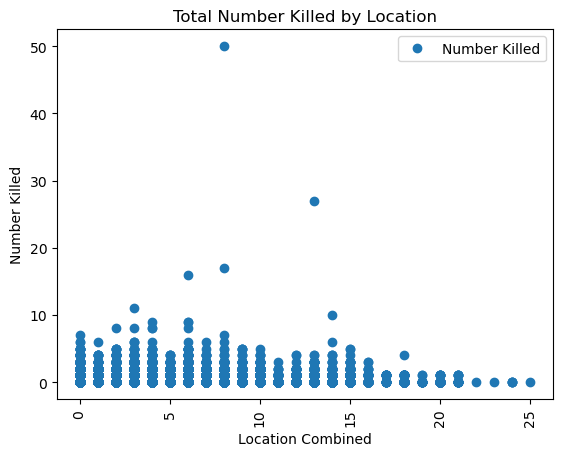

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

gv_df.plot(x = 'Location Combined', y='Number Killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Number Killed by Location')
plt.xticks(rotation=90)
plt.xlabel('Location Combined')  
plt.ylabel('Number Killed')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = gv_df['Location Combined'].values.reshape(-1,1)
y = gv_df['Number Killed'].values.reshape(-1,1)

In [27]:
X

array([[0],
       [1],
       [0],
       ...,
       [4],
       [6],
       [0]], dtype=int64)

In [28]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

---

## 04. Regression Analysis

In [32]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.bbbb

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

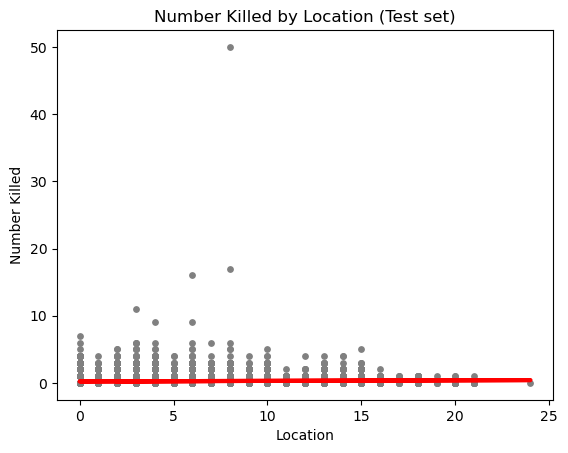

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number Killed by Location (Test set)')
plot_test.xlabel('Location')
plot_test.ylabel('Number Killed')
plot_test.show()

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00837819]]
Mean squared error:  0.3026690219839893
R2 score:  0.0031325817524606725


In [38]:
y_predicted

array([[0.27925932],
       [0.27088113],
       [0.24574656],
       ...,
       [0.22061198],
       [0.24574656],
       [0.23736836]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        0   0.279259
1        4   0.270881
2        0   0.245747
3        0   0.270881
4        0   0.262503
5        0   0.254125
6        0   0.237368
7        1   0.270881
8        0   0.220612
9        0   0.228990
10       0   0.237368
11       1   0.270881
12       0   0.346285
13       0   0.270881
14       0   0.254125
15       0   0.245747
16       0   0.245747
17       1   0.254125
18       0   0.287638
19       0   0.254125
20       0   0.220612
21       0   0.220612
22       1   0.245747
23       0   0.220612
24       0   0.220612
25       0   0.228990
26       0   0.220612
27       0   0.237368
28       2   0.245747
29       0   0.270881

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00837819]]
Mean squared error:  0.25799914802659263
R2 score:  0.0031056943968766904


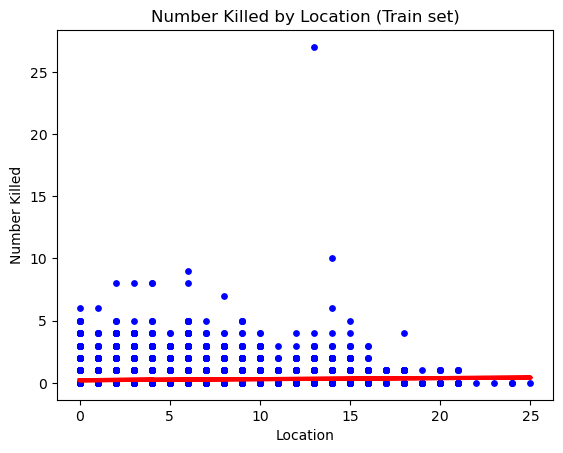

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number Killed by Location (Train set)')
plot_test.xlabel('Location')
plot_test.ylabel('Number Killed')
plot_test.show()

The above model indicates that there isn't a strong numerical correlation between location and the number of fatalities. While the number killed varies across states, there is no significant link between the number killed and the coordinates of location

---

## 05. Extracting Dataframe

In [47]:
# exporting dataframe to csv
gv_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data','6.4_gun_violence_cleaned.csv'))